In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_state_city
from math import pi, sqrt

In [3]:
state = [1, 0, 0, 0]

qc = QuantumCircuit(2) # two qubit circuit
qc.initialize(state)
qc.h(0)
qc.h(1)
qc.measure_all()
qc.draw()

┌──────────────────────┐┌───┐ ░ ┌─┐   
   q_0: ┤0                     ├┤ H ├─░─┤M├───
        │  initialize(1,0,0,0) │├───┤ ░ └╥┘┌─┐
   q_1: ┤1                     ├┤ H ├─░──╫─┤M├
        └──────────────────────┘└───┘ ░  ║ └╥┘
meas: 2/═════════════════════════════════╩══╩═
                                         0  1

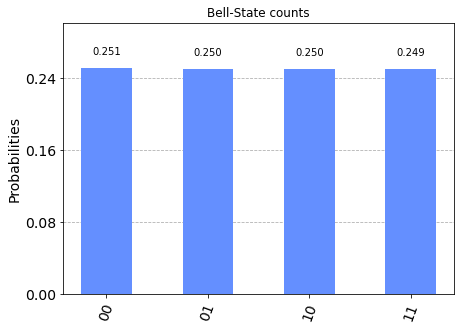

In [21]:
# Transpile for simulator
backend = Aer.get_backend('aer_simulator')
qc = transpile(qc, backend)

# Run and get counts
result = backend.run(qc, shots = 300_000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Product-State counts')